In [1]:
import matplotlib.pyplot as plt
import numpy

%matplotlib inline

In [46]:
def ChoseFractionSpilled():
    nbins = 50
    fraction = numpy.arange(0, 1 + 1/nbins, 1/nbins)
    cumulative = CumulativeSpillFraction(fraction)
    
    probability = cumulative[1:] - cumulative[:-1]
    central_value = 0.5*(fraction[1:] + fraction[:-1])
    
    spillfraction = random_generator.choice(central_value, 1, p=probability)
    return spillfraction[0]
#    return central_value, probability

In [25]:
def CumulativeSpillFraction(fraction):
    typeonefrac = 0.7
    typetwofrac = 1 - typeonefrac
    typeonedec = 28/100
    typetwodec = 2/100
    multiplier = 1/(1 - typeonefrac * numpy.exp(-1/typeonedec) - typetwofrac*numpy.exp(-1/typetwodec))
    return (1 - typeonefrac * numpy.exp(-fraction/typeonedec) 
            - typetwofrac*numpy.exp(-fraction/typetwodec)) * multiplier

In [26]:
fraction = numpy.arange(0, 1, 0.05)
cumulative = CumulativeSpillFraction(fraction)

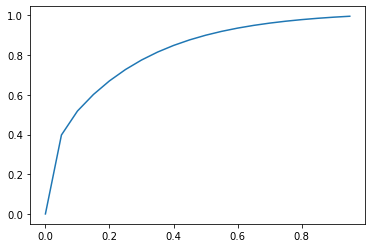

In [27]:
plt.plot(fraction, cumulative)

In [30]:
central_value, probability = ChoseFractionSpilled()

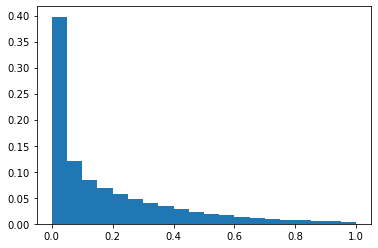

In [31]:
plt.bar(central_value, probability,width=0.05);

In [32]:
central_value

array([0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425,
       0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875,
       0.925, 0.975])

In [33]:
probability.sum()

1.0

In [34]:
CumulativeSpillFraction(1)

1.0

In [35]:
random_seed = 101
random_generator = numpy.random.default_rng(random_seed)

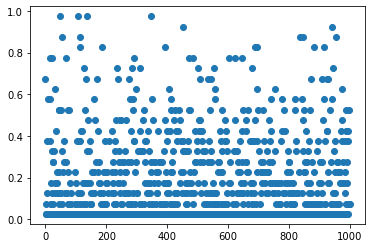

In [42]:
npoints = 1000
spills = numpy.zeros(npoints)
for ii in range(npoints):
    spills[ii] = ChoseFractionSpilled()
plt.plot(spills, 'o');

(array([403., 109.,  92.,  67.,  54.,  52.,  37.,  41.,  30.,  21.,  26.,
         14.,   7.,  12.,   8.,   9.,   7.,   5.,   2.,   4.]),
 array([0.025 , 0.0725, 0.12  , 0.1675, 0.215 , 0.2625, 0.31  , 0.3575,
        0.405 , 0.4525, 0.5   , 0.5475, 0.595 , 0.6425, 0.69  , 0.7375,
        0.785 , 0.8325, 0.88  , 0.9275, 0.975 ]),
 <a list of 20 Patch objects>)

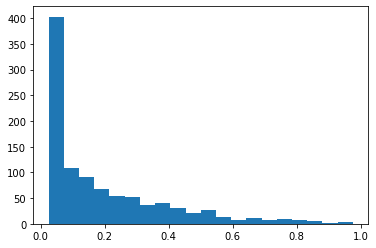

In [45]:
plt.hist(spills, bins=20)

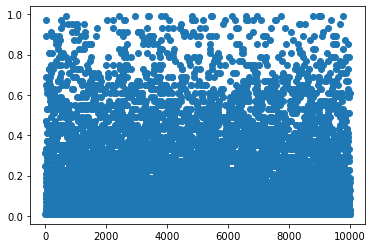

In [49]:
npoints = 10000
spills = numpy.zeros(npoints)
for ii in range(npoints):
    spills[ii] = ChoseFractionSpilled()
plt.plot(spills, 'o');

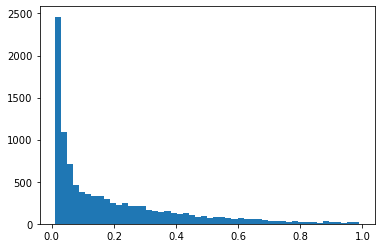

In [50]:
plt.hist(spills, bins=50);